In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from sklearn.linear_model import Ridge

def drop_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, reduce=False).all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    

In [2]:
data_set = pd.read_csv('Mumbai1.csv') 
df=data_set
data_set

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,6342,2485000,700,Shirgaon,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6343,6343,14500000,900,Thane West,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6344,6344,14500000,900,Thane West,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0
6345,6345,4100000,1380,Boisar,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
data_set.shape

(6347, 19)

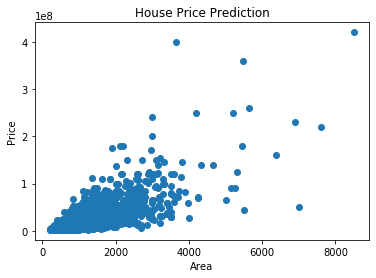

In [4]:
plt.scatter(data_set['Area'],data_set['Price'])
plt.title("House Price Prediction")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

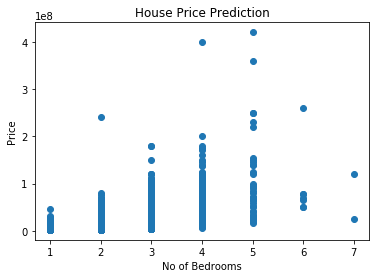

In [5]:
plt.scatter(data_set['No. of Bedrooms'],data_set['Price'])
plt.title("House Price Prediction")
plt.xlabel("No of Bedrooms")
plt.ylabel("Price")
plt.show()

In [6]:
data_set=data_set.drop('Unnamed: 0',axis=1)
data_set

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,2485000,700,Shirgaon,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6343,14500000,900,Thane West,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6344,14500000,900,Thane West,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0
6345,4100000,1380,Boisar,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
all_locations = set(())
count={}
for i in data_set['Location']:
    all_locations.add(i)
    if(count.get(i)!=None):
        count[i]=count[i]+1
    else:
        count[i]=1;
        

In [8]:
data_set

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,2485000,700,Shirgaon,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6343,14500000,900,Thane West,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6344,14500000,900,Thane West,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0
6345,4100000,1380,Boisar,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
j=0            
for i in data_set['Location']:
    if(count[i]<50):
        data_set=data_set.drop(j)
    j=j+1

In [10]:
data_set

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6340,7200000,995,Mira Road East,2,1,1,1,0,0,0,1,1,1,0,0,1,0,0
6341,7000000,1020,Mira Road East,2,1,1,1,0,0,0,1,1,1,0,0,1,0,0
6343,14500000,900,Thane West,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6344,14500000,900,Thane West,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math

# mp={}

# for i in all_locations:
#     new_data=data_set.loc[data_set['Location'] == i]
#     y=new_data['Price']
#     x=new_data.drop('Price',axis=1)
#     x=x.drop('Location',axis=1)
#     x_train = x
#     y_train = y
#     x_test = pd.read_csv('test.csv');
#     lm = LinearRegression()
#     lm.fit(x_train, y_train)
#     y_pred = lm.predict(x_test)
#     price=math.ceil(y_pred[0])
#     mp[i]=(price/1000)
    
# print(mp)

In [12]:
# for i in mp:
#     if(mp[i]<0):
#         print(i)

In [13]:

# j=0
# for i in data_set['Location']:
#     if(mp.get(i)!=None):
#         data_set['Location'][j]=mp[i]
#         if(mp[i]<0):
#             data_set=data_set.drop(j)
#         j=j+1

In [14]:
# for i in data_set['Location']:
#     print(i)

In [15]:
# data_set=data_set.drop(0)
# data_set

In [16]:
drop_outliers(data_set)
data_set.shape

C:\Users\MANTHAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The reduce argument is deprecated and will be removed in a future version. You can specify result_type='reduce' to try to reduce the result to the original dimensions
  # This is added back by InteractiveShellApp.init_path()


(3972, 18)

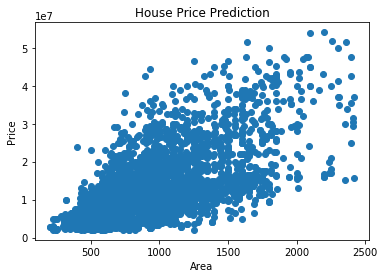

In [17]:
plt.scatter(data_set['Area'],data_set['Price'])
plt.title("House Price Prediction")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

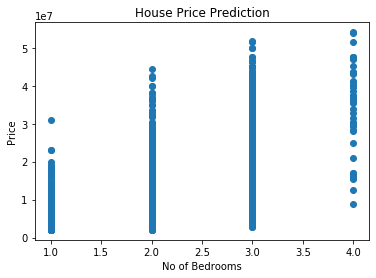

In [18]:
plt.scatter(data_set['No. of Bedrooms'],data_set['Price'])
plt.title("House Price Prediction")
plt.xlabel("No of Bedrooms")
plt.ylabel("Price")
plt.show()

In [19]:
x=data_set
y=data_set['Price']

In [20]:
y

0        4850000
1        4500000
2        6700000
3        4500000
4        5000000
          ...   
6340     7200000
6341     7000000
6343    14500000
6344    14500000
6345     4100000
Name: Price, Length: 3972, dtype: int64

In [21]:
x

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6340,7200000,995,Mira Road East,2,1,1,1,0,0,0,1,1,1,0,0,1,0,0
6341,7000000,1020,Mira Road East,2,1,1,1,0,0,0,1,1,1,0,0,1,0,0
6343,14500000,900,Thane West,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6344,14500000,900,Thane West,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [22]:
x=x.drop('Price',axis=1)

In [23]:
locs = pd.get_dummies(x['Location'],drop_first=True)
x=x.drop('Location',axis=1)
x=pd.concat([x,locs],axis=1)

In [24]:
x

,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,...,Mulund West,Naigaon East,Nala Sopara,Panvel,Powai,Taloja,Thane West,Ulwe,Ville Parle East,Virar
0,720,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,600,1,0,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,650,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,650,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,665,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6340,995,2,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6341,1020,2,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6343,900,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6344,900,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lm = LinearRegression()


In [44]:
maxx=0
ind=1
t_s=0.20
ts=0
for j in range(1,7):
    t_s = t_s + 0.05
    for i in range(1,10000):
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=t_s,random_state=i)
        lm.fit(x_train, y_train)
        y_pred = lm.predict(x_test)
        score=r2_score(y_test,y_pred)
        if(score > maxx):
            maxx=score
            ind=i
            ts=t_s
print(maxx)
print(ind)
print(ts)



#lm = LinearRegression()

#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=590)
#lm.fit(x_train, y_train)
#y_pred = lm.predict(x_test)
#score=r2_score(y_test,y_pred)
#print(score)

0.855037506572432
9035
0.25


In [27]:
train_score = lm.score(x_train,y_train)
test_score = lm.score(x_test,y_test)

mx=0
on = 0
for i in range(0,1001):
    rr = Ridge(alpha=i/1000) 
    rr.fit(x_train, y_train)
    if (mx<rr.score(x_test,y_test)):
        mx = rr.score(x_test,y_test)
        on=i/1000;


#Ridge_train_score = rr.score(x_train,y_train)
Ridge_test_score = mx


#rr100 = Ridge(alpha=0.1)
#rr100.fit(x_train, y_train)
#Ridge_train_score100 = rr100.score(x_train,y_train)
#Ridge_test_score100 = rr100.score(x_test, y_test)

In [28]:
#print(train_score,'lr_train score')
print(test_score,'lr_test score')
#print(Ridge_train_score,'Ridge_train_score')
print(Ridge_test_score,'Ridge_test_score')
print(on,'alpha')

#(Ridge_train_score100,'Ridge_train_score100')
#print(Ridge_test_score100,'Ridge_test_score100')


0.8185986248098613 lr_test score
0.8191270615952095 Ridge_test_score
0.448 alpha


In [29]:
#from sklearn.linear_model import Lasso

#mx2=0
#on2=0

#for i in range(0,1001):
#    lasso = Lasso(alpha=i/1000)
#    lasso.fit(x_train,y_train)
#    coeff_used = np.sum(lasso.coef_!=0)
#    if(mx2<lasso.score(x_test,y_test)):
#        mx2=lasso.score(x_test,y_test)
#        on2=i/1000
        
#print(mx2,'lasso-score')
#print(on2,'alpha-lasso')

#lasso_train_score=lasso.score(x_train,y_train)
#lasso_test_score=lasso.score(x_test,y_test)    
#print ("training score:", lasso_train_score) 
#print ("test score: ", lasso_test_score)
#print ("number of features used: ", coeff_used )

#lasso001 = Lasso(alpha=0.01, max_iter=10e5)
#lasso001.fit(x_train,y_train)
#train_score001=lasso001.score(x_train,y_train)
#test_score001=lasso001.score(x_test,y_test)
#coeff_used001 = np.sum(lasso001.coef_!=0)

#print ("\ntraining score for alpha=0.01:", train_score001) 
#print ("test score for alpha =0.01: ", test_score001)
#print ("number of features used: for alpha =0.01:", coeff_used001)


#lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
#lasso00001.fit(x_train,y_train)
#train_score00001=lasso00001.score(x_train,y_train)
#test_score00001=lasso00001.score(x_test,y_test)
#coeff_used00001 = np.sum(lasso00001.coef_!=0)


#print ("\ntraining score for alpha=0.0001:", train_score00001) 
#print ("test score for alpha =0.0001: ", test_score00001)
#print ("number of features used: for alpha =0.0001:", coeff_used00001)

In [30]:
# evaluate gradient boosting ensemble for regression
#from numpy import mean
#from numpy import std
#from sklearn.datasets import make_regression
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedKFold
#from sklearn.ensemble import GradientBoostingRegressor

#model = GradientBoostingRegressor()
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores = cross_val_score(model, x_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
#print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

#gbr = GradientBoostingRegressor(n_estimators = 200, max_depth = 1, random_state = 1)
#gbr.fit(x_train, y_train)
#pred_y = gbr.predict(x_test)
#test_rmse = MSE(y_test, pred_y) ** (1 / 2)
#print('RMSE test set: {:.2f}'.format(test_rmse))

In [31]:
# 0.8529823823933629
# 590
# 0.25

In [32]:
# 0.8510554031840983
# 50149

In [33]:
# 0.8503288161321243
# 8091

In [34]:
# from xgboost import XGBClassifier

In [35]:
# xgb_clf = XGBClassifier()
# xgb_clf.fit(x_train, y_train)

In [36]:
# y_pred = xgb_clf.predict(x_test)
# score =  r2_score(y_test, y_pred)
# print(score)

In [37]:
# new_data=data_set.loc[data_set['Location'] == 'Dattapada']

In [38]:
# new_data

In [39]:
# y=new_data['Price']
# x=new_data.drop('Price',axis=1)

In [40]:
# x=new_data.drop('Location',axis=1)

In [41]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score

# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=4)
# lm = LinearRegression()
# lm.fit(x_train, y_train)
# y_pred = lm.predict(x_test)
# score=lm.score(x_test,y_test)

# print(score)

In [42]:
# xgb_clf = XGBClassifier()
# xgb_clf.fit(x_train, y_train)



In [43]:
# y_pred = xgb_clf.predict(x_test)
# score =  r2_score(y_test, y_pred)
# print(score)